# Assignment 2

__Due date__: April 25, 2018 at 10 pm
__Submission__: IPython notebook to GauchoSpace

We have been building up to creating components for a dashboard app in Jupyter notebook:

- Data downloading function: `get_nba_data()` in a `03-Data-collection-and-manipulation.ipynb`. 
- Accessing pandas data frame and creating dictionary structures in `04-Pandas-Data-Frame.ipynb` and `05-Data-Frame-and-Visualization.ipynb`.
- Creating widgets for interactivity: `05-Data-Frame-and-Visualization.ipynb`.
- Plotting visualizations with Matplotlib and Seaborn: `05-Data-Frame-and-Visualization.ipynb`.

We can put these components together to create an interactive dashboard for creating something similar to the R package: https://github.com/toddwschneider/ballr

Your assignment is to create an interactive dashboard.

It doesn't have to be exactly the same as the package or what I have proposed. If you would like to create another visualization, that would be great as well. I will refer to __default option__ as continuing to do what we started in class: dashboard of shotchart similar to what [BallR package](https://github.com/toddwschneider/ballr) does. I will refer to __open-ended option__ as creating a dashboard of your choice.

Below, I specify some necessary components to your dashboard.

## Problem 1: Data Download

__Default option__: you can use the `get_nba_data()` function. No additional work is needed.

__Open-ended option__: you can choose to create a different dashboard. 

If you are familiar with http://stats.nba.com/, some stats pages will directly tell you how the data can be retrieved. For example, the data needed for [Tracking Shots Dashboard](http://stats.nba.com/player/201935/shots-dash/) comes from [this URL](http://stats.nba.com/stats/playerdashptshots?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PerMode=PerGame&Period=0&PlayerID=201935&Season=2017-18&SeasonSegment=&SeasonType=Playoffs&TeamID=0&VsConference=&VsDivision=). This link can be found under Tools > Developer tools menu (Control-Shift-I) if you are using [Google Chrome](https://www.google.com/chrome/). Once you open Developer tools, you need to reload the page (for F5). Then, go to `Networks` menu under Developer tools pane. Type into the `Filter` text input box, type `stats/`. This will find (if any) GET URL links that we can use. The URL corresponding to the [Tracking Shots Dashboard](http://stats.nba.com/player/201935/shots-dash/) is [here](http://stats.nba.com/stats/playerdashptshots?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PerMode=PerGame&Period=0&PlayerID=201935&Season=2017-18&SeasonSegment=&SeasonType=Playoffs&TeamID=0&VsConference=&VsDivision=). If you are feeling adventurous, you can use another data to create your dashboard with.

There are other interesting data sources: https://schoolofdata.org/2013/11/18/web-apis-for-non-programmers/ (note them some may be out of date since this is from 5 years ago!). If you would like to pursue a completely different data source, you are encouraged to. Keep in mind you want to create some dashboard to automatically update information. I can help you to determine wheter a site can be reverse engineered relatively easily if you choose to pursue this option.

Determine the set of parameters for creating an appropriate `param` dictionary. Test if your data download function works as intended.

In [1]:
import pandas as pd

def get_nba_data(endpt, params, return_url=False):

    ## endpt: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    ## params: dictionary of parameters: i.e., {'LeagueID':'00'}
    
    from pandas import DataFrame
    from urllib.parse import urlencode
    import json
    
    useragent = "\"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9\""
    dataurl = "\"" + "http://stats.nba.com/stats/" + endpt + "?" + urlencode(params) + "\""
    
    # for debugging: just return the url
    if return_url:
        return(dataurl)
    
    jsonstr = !wget -q -O - --user-agent={useragent} {dataurl}
    
    data = json.loads(jsonstr[0])
    
    h = data['resultSets'][0]['headers']
    d = data['resultSets'][0]['rowSet']
    
    return(DataFrame(d, columns=h))

In [2]:
params = {"MeasureType":"Base",
          "PerMode":"PerGame",
          "PlusMinus":"N",
          "PaceAdjust":"N",
          "Rank":"N",
          "LeagueID":"00",
          "Season":"2017-18",
          "SeasonType":"Playoffs",
          "PORound":"0",
          "Outcome":"",
          "Location":"",
          "Month":"0",
          "SeasonSegment":"",
          "DateFrom":"",
          "DateTo":"",
          "OpponentTeamID":"0",
          "VsConference":"",
          "VsDivision":"",
          "TeamID":"0",
          "Conference":"",
          "Division":"",
          "GameSegment":"",
          "Period":"0",
          "ShotClockRange":"",
          "LastNGames":"0",
          "GameScope":"",
          "PlayerExperience":"",
          "PlayerPosition":"",
          "StarterBench":""}

team_Playoffs = get_nba_data('leaguedashteamstats', params)
team_Playoffs.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612738,Boston Celtics,6,3,3,0.5,48.8,35.7,83.5,0.427,...,4,14,11,16,3,3,13,10,10,Boston Celtics
1,1610612739,Cleveland Cavaliers,5,3,2,0.6,48.0,33.4,76.2,0.438,...,11,11,12,3,8,6,16,10,10,Cleveland Cavaliers
2,1610612744,Golden State Warriors,5,4,1,0.8,48.0,39.6,82.8,0.478,...,7,15,8,1,5,11,7,3,10,Golden State Warriors
3,1610612745,Houston Rockets,5,4,1,0.8,48.0,39.2,88.0,0.445,...,1,13,4,2,1,15,4,3,10,Houston Rockets
4,1610612754,Indiana Pacers,5,2,3,0.4,48.0,37.0,78.8,0.470,...,11,6,14,5,9,9,15,6,10,Indiana Pacers


__We downloaded the general socre board of all teams with Playoffs season type.__

## Problem 2: Creating interactive widgets

__Default option__: create at least one more widgets (three total) for specifying data downloads. For example, you can change year, opposing team, etc.

__Open-ended option__: create at least one widget for specifying data downloads.

In this problem, you will simply create widget(s). Next section will be showing how you can combine them.

In [3]:
## get all teams
params = {'LeagueID':'00'}
teams = get_nba_data('commonTeamYears', params)

## get all players
params = {'LeagueID':'00', 'Season': '2016-17', 'IsOnlyCurrentSeason': '0'}
players = get_nba_data('commonallplayers', params)

In [4]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2017,ATL
1,00,1610612738,1946,2017,BOS
2,00,1610612739,1970,2017,CLE
3,00,1610612740,2002,2017,NOP
4,00,1610612741,1966,2017,CHI


In [5]:
players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


In [6]:
team_names = players[['TEAM_ABBREVIATION', 'TEAM_CODE']].drop_duplicates()
teams_clean = teams.copy()
teams = pd.merge(teams_clean, team_names, left_on='ABBREVIATION', right_on='TEAM_ABBREVIATION')

In [7]:
teams.TEAM_CODE = teams.TEAM_CODE.str.capitalize() # returns values so needs to be reassigned
teams.sort_values('ABBREVIATION', inplace=True)    # modifies object
teams.tail()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,TEAM_ABBREVIATION,TEAM_CODE
21,00,1610612758,1948,2017,SAC,SAC,Kings
22,00,1610612759,1976,2017,SAS,SAS,Spurs
24,00,1610612761,1995,2017,TOR,TOR,Raptors
25,00,1610612762,1974,2017,UTA,UTA,Jazz
27,00,1610612764,1961,2017,WAS,WAS,Wizards


In [8]:
team_dd_text = teams.ABBREVIATION+', '+teams.TEAM_CODE
team_dd = dict(zip(team_dd_text, teams.TEAM_ID))
team_dd

{'ATL, Hawks': 1610612737,
 'BKN, Nets': 1610612751,
 'BOS, Celtics': 1610612738,
 'CHA, Hornets': 1610612766,
 'CHI, Bulls': 1610612741,
 'CLE, Cavaliers': 1610612739,
 'DAL, Mavericks': 1610612742,
 'DEN, Nuggets': 1610612743,
 'DET, Pistons': 1610612765,
 'GSW, Warriors': 1610612744,
 'HOU, Rockets': 1610612745,
 'IND, Pacers': 1610612754,
 'LAC, Clippers': 1610612746,
 'LAL, Lakers': 1610612747,
 'MEM, Grizzlies': 1610612763,
 'MIA, Heat': 1610612748,
 'MIL, Bucks': 1610612749,
 'MIN, Timberwolves': 1610612750,
 'NOP, Pelicans': 1610612740,
 'NYK, Knicks': 1610612752,
 'OKC, Thunder': 1610612760,
 'ORL, Magic': 1610612753,
 'PHI, Sixers': 1610612755,
 'PHX, Suns': 1610612756,
 'POR, Blazers': 1610612757,
 'SAC, Kings': 1610612758,
 'SAS, Spurs': 1610612759,
 'TOR, Raptors': 1610612761,
 'UTA, Jazz': 1610612762,
 'WAS, Wizards': 1610612764}

In [9]:
plyr_by_team_dd = dict()

for t, p in players.groupby('TEAM_ID'):
    
    plyr_by_team_dd[t] = dict(zip(p.DISPLAY_LAST_COMMA_FIRST, p.PERSON_ID))
    
plyr_by_team_dd

{0: {'Abdelnaby, Alaa': 76001,
  'Abdul-Aziz, Zaid': 76002,
  'Abdul-Jabbar, Kareem': 76003,
  'Abdul-Rauf, Mahmoud': 51,
  'Abdul-Wahad, Tariq': 1505,
  'Abdur-Rahim, Shareef': 949,
  'Abernethy, Tom': 76005,
  'Able, Forest': 76006,
  'Abramovic, John': 76007,
  'Acker, Alex': 101165,
  'Ackerman, Donald': 76008,
  'Acres, Mark': 76009,
  'Acton, Charles': 76010,
  'Adams, Alvan': 76011,
  'Adams, Don': 76012,
  'Adams, Hassan': 200801,
  'Adams, Jordan': 203919,
  'Adams, Michael': 149,
  'Addison, Rafael': 912,
  'Adebayo, Bam': 1628389,
  'Adelman, Rick': 76015,
  'Adrien, Jeff': 202399,
  'Ager, Maurice': 200772,
  'Aguirre, Mark': 76016,
  'Ahearn, Blake': 201336,
  'Ainge, Danny': 76017,
  'Akin, Henry': 76018,
  'Akognon, Josh': 203006,
  'Alabi, Solomon': 202374,
  'Alarie, Mark': 76019,
  'Alcorn, Gary': 76020,
  'Aldemir, Furkan': 203128,
  'Aleksinas, Chuck': 76021,
  'Alexander, Cliff': 1626146,
  'Alexander, Cory': 724,
  'Alexander, Courtney': 2042,
  'Alexander, Gary':

__We donwnload and combine the score board with four different season type together using `pd.concat()`__

In [10]:
Season_Type = ["Pre Season","Regular Season","Playoffs","All Star"]
frames = [] # create an empty dataframe

for i in Season_Type:
    params = {"MeasureType":"Base", "PerMode":"PerGame", "PlusMinus":"N", "PaceAdjust":"N",
              "Rank":"N", "LeagueID":"00", "Season":"2017-18", "SeasonType": i, "PORound":"0",
              "Outcome":"", "Location":"", "Month":"0", "SeasonSegment":"", "DateFrom":"", 
              "DateTo":"", "OpponentTeamID":"0", "VsConference":"", "VsDivision":"", "TeamID":"0",
              "Conference":"", "Division":"", "GameSegment":"", "Period":"0", "ShotClockRange":"",
              "LastNGames":"0", "GameScope":"", "PlayerExperience":"", "PlayerPosition":"",
              "StarterBench":""}

    team_data = get_nba_data('leaguedashteamstats', params)
    team_data["SEASON_TYPE"] = i
    frames.append(team_data)

season_dd = pd.concat(frames) # combine data of different season type
season_dd.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,SEASON_TYPE
0,1.610613e+09,Atlanta Hawks,5.0,2.0,3.0,0.400,48.0,33.4,82.0,0.407,...,25.0,27.0,22.0,4.0,12.0,26.0,21.0,10.0,Atlanta Hawks,Pre Season
1,1.610613e+09,Boston Celtics,4.0,4.0,0.0,1.000,48.0,38.8,90.3,0.429,...,6.0,14.0,16.0,15.0,21.0,13.0,6.0,10.0,Boston Celtics,Pre Season
2,1.501700e+04,Brisbane Bullets ...,1.0,0.0,1.0,0.000,48.0,38.0,99.0,0.384,...,35.0,27.0,35.0,20.0,34.0,30.0,32.0,10.0,Brisbane Bullets,Pre Season
3,1.610613e+09,Brooklyn Nets,3.0,2.0,1.0,0.667,48.0,41.0,88.3,0.464,...,10.0,17.0,27.0,35.0,3.0,5.0,5.0,10.0,Brooklyn Nets,Pre Season
4,1.610613e+09,Charlotte Hornets,5.0,2.0,3.0,0.400,48.0,37.8,86.2,0.439,...,32.0,20.0,28.0,6.0,20.0,18.0,16.0,10.0,Charlotte Hornets,Pre Season


In [11]:
params = {"MeasureType":"Base", "PerMode":"PerGame", "PlusMinus":"N", "PaceAdjust":"N",
              "Rank":"N", "LeagueID":"00", "Season":"2017-18", "SeasonType": "All Star", "PORound":"0",
              "Outcome":"", "Location":"", "Month":"0", "SeasonSegment":"", "DateFrom":"", 
              "DateTo":"", "OpponentTeamID":"0", "VsConference":"", "VsDivision":"", "TeamID":"0",
              "Conference":"", "Division":"", "GameSegment":"", "Period":"0", "ShotClockRange":"",
              "LastNGames":"0", "GameScope":"", "PlayerExperience":"", "PlayerPosition":"",
              "StarterBench":""}

team_allstar = get_nba_data('leaguedashteamstats', params)
team_allstar # We find that there is not All-Star data

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS


__However, we find that there is no data with All-Star during this season. Then, we change the data type of `TEAM_ID` to combine with other data later.__

In [12]:
print(season_dd.TEAM_ID.dtype) 

float64


In [13]:
season_dd.TEAM_ID = season_dd.TEAM_ID.astype('int')
print(season_dd.TEAM_ID.dtype)

int64


__We filter `season_dd` whose `TEAM_ID` are also in `teams`.__

In [14]:
season_dd = season_dd[season_dd.TEAM_ID.isin(teams.TEAM_ID)]
season_dd.tail()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,SEASON_TYPE
11,1610612757,Portland Trail Blazers,4.0,0.0,4.0,0.0,48.0,41.3,91.0,0.453,...,7.0,13.0,15.0,7.0,13.0,8.0,15.0,10.0,Portland Trail Blazers,Playoffs
12,1610612759,San Antonio Spurs,5.0,1.0,4.0,0.2,48.0,34.6,83.8,0.413,...,9.0,16.0,9.0,6.0,12.0,14.0,13.0,10.0,San Antonio Spurs,Playoffs
13,1610612761,Toronto Raptors,5.0,3.0,2.0,0.6,48.0,39.0,81.4,0.479,...,10.0,4.0,10.0,12.0,6.0,3.0,8.0,10.0,Toronto Raptors,Playoffs
14,1610612762,Utah Jazz,5.0,3.0,2.0,0.6,48.0,38.4,84.6,0.454,...,5.0,6.0,7.0,9.0,4.0,6.0,5.0,10.0,Utah Jazz,Playoffs
15,1610612764,Washington Wizards,5.0,2.0,3.0,0.4,48.0,41.2,86.4,0.477,...,3.0,7.0,12.0,9.0,5.0,5.0,9.0,10.0,Washington Wizards,Playoffs


__We want to create a widget that shows the win rate of each teams with different season types.__

In [15]:
W_PCT_by_season = dict()

for i, j in season_dd.groupby('TEAM_ID'):
    
    W_PCT_by_season[i] = dict(zip(j.SEASON_TYPE, j.W_PCT)) # Win rate by different season type

W_PCT_by_season

{1610612737: {'Pre Season': 0.40000000000000002,
  'Regular Season': 0.29299999999999998},
 1610612738: {'Playoffs': 0.5,
  'Pre Season': 1.0,
  'Regular Season': 0.67100000000000004},
 1610612739: {'Playoffs': 0.59999999999999998,
  'Pre Season': 0.20000000000000001,
  'Regular Season': 0.60999999999999999},
 1610612740: {'Playoffs': 1.0,
  'Pre Season': 0.33300000000000002,
  'Regular Season': 0.58499999999999996},
 1610612741: {'Pre Season': 0.40000000000000002,
  'Regular Season': 0.32900000000000001},
 1610612742: {'Pre Season': 0.66700000000000004,
  'Regular Season': 0.29299999999999998},
 1610612743: {'Pre Season': 0.59999999999999998,
  'Regular Season': 0.56100000000000005},
 1610612744: {'Playoffs': 0.80000000000000004,
  'Pre Season': 0.5,
  'Regular Season': 0.70699999999999996},
 1610612745: {'Playoffs': 0.80000000000000004,
  'Pre Season': 0.75,
  'Regular Season': 0.79300000000000004},
 1610612746: {'Pre Season': 0.25, 'Regular Season': 0.51200000000000001},
 1610612747

In [16]:
from ipywidgets import interact, FloatSlider, Dropdown, Button

selected = 'LAC, Clippers'

team_menu = Dropdown(options=team_dd, label=selected)
plyr_menu = Dropdown(options=plyr_by_team_dd[team_dd[selected]])
W_PCT_menu = Dropdown(options=W_PCT_by_season[team_dd[selected]])

display(team_menu, plyr_menu, W_PCT_menu)

Dropdown(index=12, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612746)

Dropdown(options={'Anderson, Alan': 101187, 'Bass, Brandon': 101138, 'Crawford, Jamal': 2037, 'Felton, Raymond': 101109, 'Griffin, Blake': 201933, 'Johnson, Brice': 1627744, 'Johnson, Wesley': 202325, 'Jordan, DeAndre': 201599, 'Mbah a Moute, Luc': 201601, 'Paul, Chris': 101108, 'Pierce, Paul': 1718, 'Redick, JJ': 200755, 'Rivers, Austin': 203085, 'Speights, Marreese': 201578, 'Stone, Diamond': 1627754}, value=101187)

Dropdown(options={'Pre Season': 0.25, 'Regular Season': 0.51200000000000001}, value=0.25)

In [17]:
W_PCT_by_season[team_dd[selected]]

{'Pre Season': 0.25, 'Regular Season': 0.51200000000000001}

## Problem 3: Downloading data with changing widget states

__Both options__: Add event handlers (`observe`, `on_click`, etc) to be called when some widget changes to another state. Make sure this works as expected.

In [18]:
selected = 'LAC, Clippers'

team_menu = Dropdown(options=team_dd, label=selected)
plyr_menu = Dropdown(options=plyr_by_team_dd[team_dd[selected]])
W_PCT_menu = Dropdown(options=W_PCT_by_season[team_dd[selected]])
fetch_button = Button(description='Get Data!', icon='check')

display(team_menu, plyr_menu, W_PCT_menu, fetch_button)

## update players list
def update_team(change):
    plyr_menu.index = None
    W_PCT_menu.index = None
    plyr_menu.options = plyr_by_team_dd[change['new']]
    W_PCT_menu.options = W_PCT_by_season[change['new']]

team_menu.observe(update_team, names='value')

## get data action
def get_data(change):
    print(team_menu.value, plyr_menu.value)
    print('WIN RATE IS:', W_PCT_menu.value)

    
fetch_button.on_click(get_data)

Dropdown(index=12, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612746)

Dropdown(options={'Anderson, Alan': 101187, 'Bass, Brandon': 101138, 'Crawford, Jamal': 2037, 'Felton, Raymond': 101109, 'Griffin, Blake': 201933, 'Johnson, Brice': 1627744, 'Johnson, Wesley': 202325, 'Jordan, DeAndre': 201599, 'Mbah a Moute, Luc': 201601, 'Paul, Chris': 101108, 'Pierce, Paul': 1718, 'Redick, JJ': 200755, 'Rivers, Austin': 203085, 'Speights, Marreese': 201578, 'Stone, Diamond': 1627754}, value=101187)

Dropdown(options={'Pre Season': 0.25, 'Regular Season': 0.51200000000000001}, value=0.25)

Button(description='Get Data!', icon='check', style=ButtonStyle())

## Problem 4: Data transformation and visualization

__Default option__: create at least two data transformation using split-apply-combine approach. Some ideas are, 

- What is the shooting average against different teams? You would split based on opposing team, compute the average, and plot a bar chart. 

- What is the shooting average over different periods per game? You would split based on periods and game, then plot the changing shooting average over periods. Is this helpful? Why? Why not?

- Any other setting in which you would need to split-apply-combine to calculate a summary statistic.

- A setting of your choosing

Plot your result

__Open-ended option__: create at least one data transformation using split-apply-combine approach.

Plot your result

In [19]:
params = {'PlayerID':'202344',
          'PlayerPosition':'',
          'Season':'2016-17',
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'0',
          'VsConference':'',
          'VsDivision':''}

shotdata = get_nba_data('shotchartdetail', params)
shotdata.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600006,226,202344,Trevor Booker,1610612751,Brooklyn Nets,2,3,5,...,Center(C),Less Than 8 ft.,1,9,8,1,1,20161026,BOS,BKN
1,Shot Chart Detail,0021600006,269,202344,Trevor Booker,1610612751,Brooklyn Nets,2,0,41,...,Left Side Center(LC),16-24 ft.,18,-104,159,1,1,20161026,BOS,BKN
2,Shot Chart Detail,0021600006,324,202344,Trevor Booker,1610612751,Brooklyn Nets,3,6,47,...,Right Side Center(RC),24+ ft.,25,191,165,1,0,20161026,BOS,BKN
3,Shot Chart Detail,0021600006,494,202344,Trevor Booker,1610612751,Brooklyn Nets,4,2,56,...,Center(C),Less Than 8 ft.,0,4,7,1,1,20161026,BOS,BKN
4,Shot Chart Detail,0021600006,535,202344,Trevor Booker,1610612751,Brooklyn Nets,4,1,4,...,Center(C),Less Than 8 ft.,0,0,1,1,1,20161026,BOS,BKN


In [20]:
list(shotdata)

['GRID_TYPE',
 'GAME_ID',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_NAME',
 'PERIOD',
 'MINUTES_REMAINING',
 'SECONDS_REMAINING',
 'EVENT_TYPE',
 'ACTION_TYPE',
 'SHOT_TYPE',
 'SHOT_ZONE_BASIC',
 'SHOT_ZONE_AREA',
 'SHOT_ZONE_RANGE',
 'SHOT_DISTANCE',
 'LOC_X',
 'LOC_Y',
 'SHOT_ATTEMPTED_FLAG',
 'SHOT_MADE_FLAG',
 'GAME_DATE',
 'HTM',
 'VTM']

__We split data by `GAME_DATE`, calcluate percentage of shot made flage using `mean()`, and plot the transformed data.__

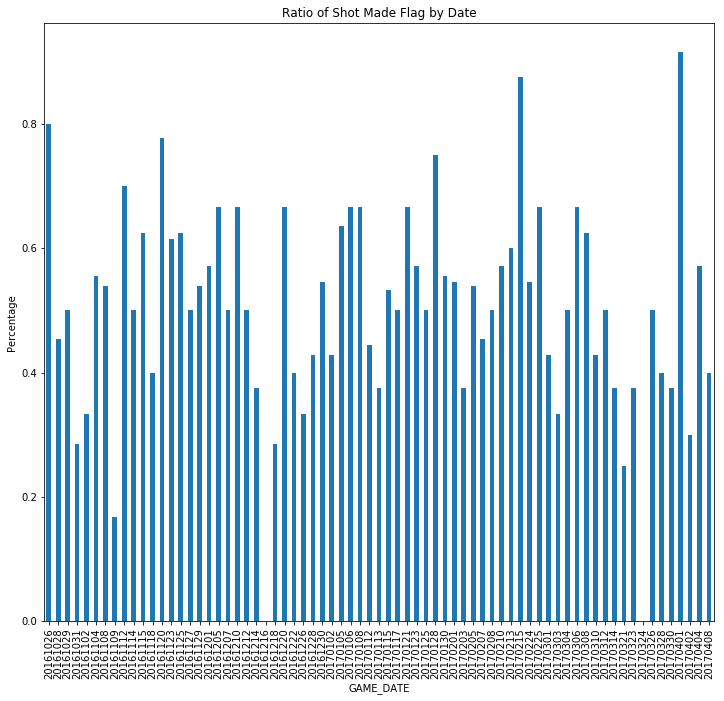

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,11))

SHOT_MADE_PCT = shotdata.groupby("GAME_DATE")['SHOT_MADE_FLAG'].mean()

plt.title("Ratio of Shot Made Flag by Date")
plt.xlabel("Date")
plt.ylabel("Percentage")
SHOT_MADE_PCT.plot.bar()
plt.show()

__In terms of this histgram, we find that Trevor Booker has the highest rate to make shots in April 2nd, 2017.__

__The second transformation is count the shot made flag by its action types.__

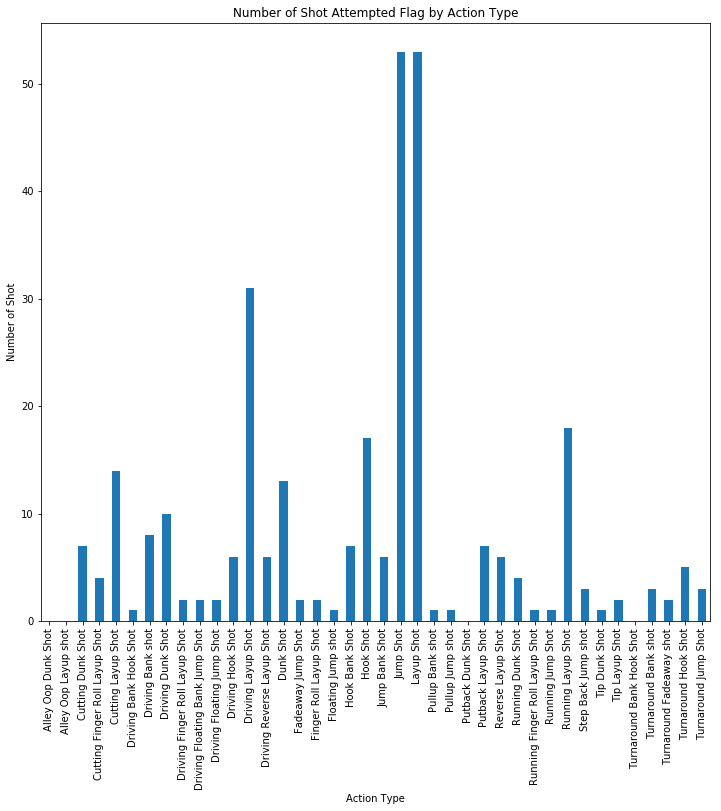

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,11))

NUM_OF_SHOT_ATTEMPTED = shotdata.groupby("ACTION_TYPE")['SHOT_MADE_FLAG'].sum()

NUM_OF_SHOT_ATTEMPTED.plot.bar()
plt.title("Number of Shot Attempted Flag by Action Type")
plt.xlabel("Action Type")
plt.ylabel("Number of Shot")
plt.show()

__According to the histgram, me conclude that Trevor Booker prefers Jump shot and Lay up shot.__

## Notes

- Open-ended option will be a lot more work; however, you can use this towards building up your final projects if you so choose. 

- Label figures, and explain your steps. PSTAT 234 students' work are expected to be more refined.

- Exceptional assignments will receive extra credit.